<a href="https://colab.research.google.com/github/nxxk23/bsc_dpdm22/blob/main/%5Bdataprep1%5Dproperty_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#สรุปข้อมูลของนักประเมินแต่ละคน 
    โดยพิจารณาจากความมั่นใจในการประเมิน ประเมินราคาซื้อ-ขาย ให้คะแนนทรัพย์


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df1 = pd.read_excel('/content/drive/MyDrive/DPDM/คำตอบนักประเมิน.xlsx',sheet_name='บ้าน',skiprows=0)
df2 = pd.read_excel('/content/drive/MyDrive/DPDM/คำตอบนักประเมิน.xlsx',sheet_name='ที่ดิน',skiprows=0)
df3 = pd.read_excel('/content/drive/MyDrive/DPDM/คำตอบนักประเมิน.xlsx',sheet_name='คอนโด',skiprows=0)
df4 = pd.read_excel('/content/drive/MyDrive/DPDM/คำตอบนักประเมิน.xlsx',sheet_name='ทาวน์โฮม',skiprows=0)
df5 = pd.read_excel('/content/drive/MyDrive/DPDM/คำตอบนักประเมิน.xlsx',sheet_name='อาคารพาณิชย์',skiprows=0)

In [4]:
df1.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย                True
ปัจจัยในการประเมินราคาซื้อ-ขาย     True
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                     True
Unnamed: 9                         True
Unnamed: 10                        True
Unnamed: 11                        True
Unnamed: 12                        True
Unnamed: 13                        True
dtype: bool

In [5]:
df2.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย                True
ปัจจัยในการประเมินราคาซื้อ-ขาย     True
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                     True
Unnamed: 9                         True
Unnamed: 10                        True
Unnamed: 11                        True
Unnamed: 12                        True
dtype: bool

In [6]:
df3.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย               False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                    False
Unnamed: 9                        False
Unnamed: 10                       False
dtype: bool

In [7]:
df4.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย               False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                    False
Unnamed: 9                         True
Unnamed: 10                        True
Unnamed: 11                        True
Unnamed: 12                        True
dtype: bool

In [8]:
df5.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย               False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                    False
Unnamed: 9                        False
Unnamed: 10                       False
Unnamed: 11                        True
Unnamed: 12                        True
Unnamed: 13                        True
dtype: bool

#ข้อมูลประเมิน(บ้าน)

In [9]:
df1.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


##ผู้ประเมินคนที่ 1

In [10]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 1 
a1 = df1[df1['ID ผู้ประเมิน']==1]
a1.count()

ID ผู้ประเมิน                     100
post id                           100
property_type                     100
ความมั่นใจในการเมินราคาทรัพย์     100
ราคาทรัพย์                        100
ประเมินราคาซื้อ-ขาย               100
ปัจจัยในการประเมินราคาซื้อ-ขาย    100
เหตุผลไม่มั่นใจราคาประเมิน          0
ให้คะแนนทรัพย์                    100
Unnamed: 9                          0
Unnamed: 10                         0
Unnamed: 11                         0
Unnamed: 12                         0
Unnamed: 13                         1
dtype: int64

ผู้ประเมินคนที่ 1 ประเมินบ้านไว้ทั้งหมด 100 ทรัพย์

In [11]:
a1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,100.0,1.000000e+02,1.000000e+02,0.0,0.0,0.0,0.0,1.0
mean,1.0,4.316360e+06,3.938500e+06,NaN,NaN,NaN,NaN,100.0
std,0.0,2.865391e+06,2.368553e+06,NaN,NaN,NaN,NaN,NaN
min,1.0,3.900000e+05,6.000000e+05,NaN,NaN,NaN,NaN,100.0
25%,1.0,2.892750e+06,2.775000e+06,NaN,NaN,NaN,NaN,100.0
50%,1.0,3.962000e+06,3.600000e+06,NaN,NaN,NaN,NaN,100.0
75%,1.0,5.000000e+06,4.500000e+06,NaN,NaN,NaN,NaN,100.0
max,1.0,2.094900e+07,1.600000e+07,NaN,NaN,NaN,NaN,100.0


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์บ้านของคนที่ 1 = 600000
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์บ้านของคนที่ 1 = 16000000

In [12]:
a1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [13]:
a1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

##ผู้ประเมินคนที่ 2

In [14]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 2
a2 = df1[df1['ID ผู้ประเมิน']==2]
a2.count()

ID ผู้ประเมิน                     90
post id                           90
property_type                     90
ความมั่นใจในการเมินราคาทรัพย์     90
ราคาทรัพย์                        90
ประเมินราคาซื้อ-ขาย               89
ปัจจัยในการประเมินราคาซื้อ-ขาย    89
เหตุผลไม่มั่นใจราคาประเมิน         1
ให้คะแนนทรัพย์                    89
Unnamed: 9                         0
Unnamed: 10                        0
Unnamed: 11                        0
Unnamed: 12                        0
Unnamed: 13                        0
dtype: int64

ผู้ประเมินคนที่ 2 ประเมินบ้านไว้ทั้งหมด 90 ทรัพย์

In [15]:
a2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,90.0,9.000000e+01,8.900000e+01,0.0,0.0,0.0,0.0,0.0
mean,2.0,4.240733e+06,4.153258e+06,NaN,NaN,NaN,NaN,NaN
std,0.0,2.714815e+06,2.386901e+06,NaN,NaN,NaN,NaN,NaN
min,2.0,3.900000e+05,9.900000e+05,NaN,NaN,NaN,NaN,NaN
25%,2.0,2.860000e+06,2.600000e+06,NaN,NaN,NaN,NaN,NaN
50%,2.0,4.000000e+06,3.900000e+06,NaN,NaN,NaN,NaN,NaN
75%,2.0,5.000000e+06,4.900000e+06,NaN,NaN,NaN,NaN,NaN
max,2.0,2.094900e+07,1.700000e+07,NaN,NaN,NaN,NaN,NaN


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์บ้านของคนที่ 2 = 9900000
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์บ้านของคนที่ 2 = 17000000

In [16]:
a2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       89
ไม่มั่นใจ     1
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [17]:
a2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     64
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      23
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     1
Name: ให้คะแนนทรัพย์, dtype: int64

##เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์(บ้าน)ของนักประเมินแต่ละคนและของราคาตั้งขาย


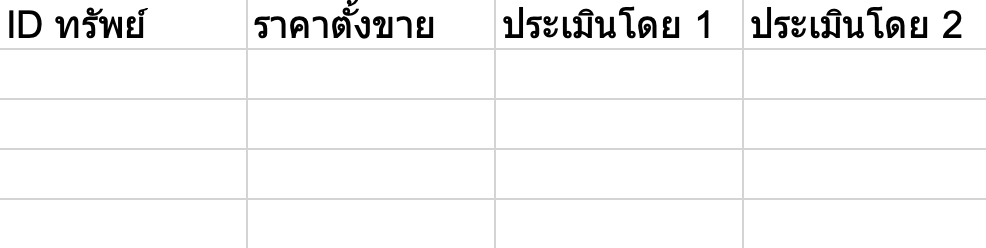

In [18]:
a2['ประเมิน1'] = a2['post id'].map(a1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
a2.head()

<ipython-input-18-a52e573bc7b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a2['ประเมิน1'] = a2['post id'].map(a1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN,2500000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,2200000.0
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,NaN,NaN,NaN,NaN,NaN,5000000.0
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,3500000.0
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,2500000.0


###rename column

In [19]:
a2.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### select columns

In [20]:
home = a2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]
home

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0
...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0


####Drop NaN

In [21]:
home.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2       True
dtype: bool

In [22]:
home = home.dropna()
home

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0
...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0


In [23]:
home.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2      False
dtype: bool

##MAPE ราคาทรัพย์เป็นหลัก เทียบ ผู้ประเมิน

หา mean absolute percentage error 
- โดยราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 12.321512246130807
- โดยราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 10.417687099245775
* หมายความว่า ผู้ประเมินคนที่ 2 สามารถประเมินราคาทรัพย์(บ้าน)ได้ใกล้เคียงกว่าคนที่1

In [24]:
actual = home['ราคาทรัพย์']
pred1 = home['ประเมิน1']
pred2 = home['ประเมิน2']

In [25]:
import numpy as np

def mape(actual, pred1): 
    actual, pred1 = np.array(actual), np.array(pred1)
    return np.mean(np.abs((actual - pred1) / actual)) * 100
mape(actual, pred1)

12.321512246130807

In [26]:
import numpy as np

def mape(actual, pred2): 
    actual, pred2 = np.array(actual), np.array(pred2)
    return np.mean(np.abs((actual - pred2) / actual)) * 100
mape(actual, pred2)

10.417687099245775

##MAPE ผู้ประเมินเป็นหลัก เทียบ ราคาทรัพย์

- โดยผู้ประเมินคนที่ 1 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 13.055527046371376
- โดยผู้ประเมินคนที่ 2 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 8.521474003880796

In [27]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = home['ประเมิน1']
y_pred = home['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

13.055527046371376

In [28]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = home['ประเมิน2']
y_pred = home['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

8.521474003880796

##MAPE ผู้ประเมินเทียบผู้ประเมิน

หา mean absolute percentage error

- โดยผู้ประเมินคนที่ 1 เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 13.626068116793128
- โดยผู้ประเมินคนที่ 2 เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 11.582834887783596

In [29]:
import numpy as np

def mape(pred1, pred2): 
    pred1, pred2 = np.array(pred1), np.array(pred2)
    return np.mean(np.abs((pred1 - pred2) / pred1)) * 100
mape(pred1, pred2)

13.626068116793128

In [30]:
import numpy as np

def mape(pred2, pred1): 
    pred2, pred1 = np.array(pred2), np.array(pred1)
    return np.mean(np.abs((pred2 - pred1) / pred2)) * 100
mape(pred2, pred1)

11.582834887783596

#ข้อมูลประเมิน(ที่ดิน)

##ผู้ประเมินคนที่ 1

In [31]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 1 
t1 = df2[df2['ID ผู้ประเมิน']==1]
t1.count()

ID ผู้ประเมิน                     100
post id                           100
property_type                     100
ความมั่นใจในการเมินราคาทรัพย์     100
ราคาทรัพย์                        100
ประเมินราคาซื้อ-ขาย               100
ปัจจัยในการประเมินราคาซื้อ-ขาย    100
เหตุผลไม่มั่นใจราคาประเมิน          0
ให้คะแนนทรัพย์                    100
Unnamed: 9                         10
Unnamed: 10                        10
Unnamed: 11                         0
Unnamed: 12                         1
dtype: int64

ผู้ประเมินคนที่ 1 ประเมินที่ดินไว้ทั้งหมด 100 ทรัพย์

In [32]:
t1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,Unnamed: 9,Unnamed: 11,Unnamed: 12
count,100.0,1.000000e+02,1.000000e+02,10.000000,0.0,1.0
mean,1.0,1.644375e+07,9.069000e+06,2.500000,NaN,100.0
std,0.0,4.202164e+07,2.322360e+07,0.527046,NaN,NaN
min,1.0,6.500000e+05,5.000000e+05,2.000000,NaN,100.0
25%,1.0,1.900000e+06,1.675000e+06,2.000000,NaN,100.0
50%,1.0,3.999500e+06,3.175000e+06,2.500000,NaN,100.0
75%,1.0,1.207500e+07,1.000000e+07,3.000000,NaN,100.0
max,1.0,2.860000e+08,2.220000e+08,3.000000,NaN,100.0


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์ที่ดินของคนที่ 1 = 5.000000e+05
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์ที่ดินของคนที่ 1 = 2.220000e+08	

In [33]:
t1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [34]:
t1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    55
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
Name: ให้คะแนนทรัพย์, dtype: int64

##ผู้ประเมินคนที่ 2

In [35]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 2
t2 = df2[df2['ID ผู้ประเมิน']==2]
t2.count()

ID ผู้ประเมิน                     100
post id                           100
property_type                     100
ความมั่นใจในการเมินราคาทรัพย์     100
ราคาทรัพย์                        100
ประเมินราคาซื้อ-ขาย               100
ปัจจัยในการประเมินราคาซื้อ-ขาย    100
เหตุผลไม่มั่นใจราคาประเมิน          0
ให้คะแนนทรัพย์                    100
Unnamed: 9                         10
Unnamed: 10                        10
Unnamed: 11                         0
Unnamed: 12                         0
dtype: int64

ผู้ประเมินคนที่ 2 ประเมินที่ดินไว้ทั้งหมด 100 ทรัพย์

In [36]:
t2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,Unnamed: 9,Unnamed: 11,Unnamed: 12
count,100.0,1.000000e+02,1.000000e+02,10.000000,0.0,0.0
mean,2.0,1.644375e+07,1.196550e+07,2.300000,NaN,NaN
std,0.0,4.202164e+07,2.843751e+07,0.483046,NaN,NaN
min,2.0,6.500000e+05,7.000000e+05,2.000000,NaN,NaN
25%,2.0,1.900000e+06,1.800000e+06,2.000000,NaN,NaN
50%,2.0,3.999500e+06,3.800000e+06,2.000000,NaN,NaN
75%,2.0,1.207500e+07,1.000000e+07,2.750000,NaN,NaN
max,2.0,2.860000e+08,2.500000e+08,3.000000,NaN,NaN


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์ที่ดินของคนที่ 2 = 7.000000e+05
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์ที่ดินของคนที่ 2 = 2.500000e+08

In [37]:
t2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [38]:
t2['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    52
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       3
Name: ให้คะแนนทรัพย์, dtype: int64

##ผู้ประเมินคนที่ 3

In [39]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 2
t3 = df2[df2['ID ผู้ประเมิน']==4]
t3.count()

ID ผู้ประเมิน                     10
post id                           10
property_type                     10
ความมั่นใจในการเมินราคาทรัพย์     10
ราคาทรัพย์                        10
ประเมินราคาซื้อ-ขาย                7
ปัจจัยในการประเมินราคาซื้อ-ขาย     7
เหตุผลไม่มั่นใจราคาประเมิน         3
ให้คะแนนทรัพย์                     7
Unnamed: 9                         7
Unnamed: 10                        7
Unnamed: 11                        0
Unnamed: 12                        0
dtype: int64

ผู้ประเมินคนที่ 3 ประเมินที่ดินไว้ทั้งหมด 10 ทรัพย์

In [40]:
t3.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,Unnamed: 9,Unnamed: 11,Unnamed: 12
count,10.0,1.000000e+01,7.000000e+00,7.000000,0.0,0.0
mean,4.0,2.191000e+07,7.000000e+06,2.714286,NaN,NaN
std,0.0,3.030465e+07,6.238322e+06,0.487950,NaN,NaN
min,4.0,2.200000e+06,2.500000e+06,2.000000,NaN,NaN
25%,4.0,3.750000e+06,3.500000e+06,2.500000,NaN,NaN
50%,4.0,9.350000e+06,4.500000e+06,3.000000,NaN,NaN
75%,4.0,1.610000e+07,7.500000e+06,3.000000,NaN,NaN
max,4.0,9.000000e+07,2.000000e+07,3.000000,NaN,NaN


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์ที่ดินของคนที่ 3 = 2.500000e+06
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์ที่ดินของคนที่ 3 = 2.000000e+07

In [41]:
t3['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       7
ไม่มั่นใจ    3
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [42]:
t3['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     5
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    2
Name: ให้คะแนนทรัพย์, dtype: int64

##เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์(ที่ดิน)ของนักประเมินแต่ละคนและของราคาตั้งขาย


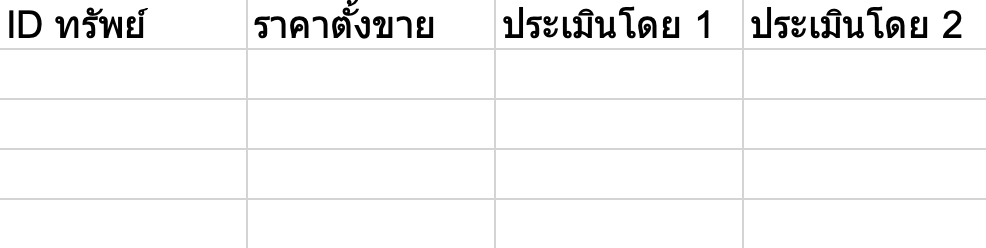

In [43]:
t2['ประเมิน1'] = t2['post id'].map(t1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
t2.head()

<ipython-input-43-d1663d6264be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['ประเมิน1'] = t2['post id'].map(t1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,1800000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,8000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,"30,000-40,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,18000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,60000000.0,"ราคาเสนอขาย 12,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,35000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2500000.0,"ราคาเสนอขาย 2,000 - 4,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,2200000.0


###rename column

In [44]:
t2.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### select columns

In [45]:
land = t2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]
land

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [46]:
land.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2      False
dtype: bool

##MAPE ผู้ประเมินเป็นหลัก เทียบ ราคาทรัพย์

- โดยผู้ประเมินคนที่ 1 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 83.48110682471777

- โดยผู้ประเมินคนที่ 2 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 48.37938341613725

In [47]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = land['ประเมิน1']
y_pred = land['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

83.48110682471777

In [48]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = land['ประเมิน2']
y_pred = land['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

48.37938341613725

#ข้อมูลประเมิน(คอนโด)

In [49]:
df3.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,1395.0,คอนโด,มั่นใจ,1600000.0,2300000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,1443.0,คอนโด,มั่นใจ,1860000.0,1800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


##ผู้ประเมินคนที่ 1

In [50]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 1 
s1 = df3[df3['ID ผู้ประเมิน']==1]
s1.count()

ID ผู้ประเมิน                     10
post id                           10
property_type                     10
ความมั่นใจในการเมินราคาทรัพย์     10
ราคาทรัพย์                        10
ประเมินราคาซื้อ-ขาย               10
ปัจจัยในการประเมินราคาซื้อ-ขาย    10
เหตุผลไม่มั่นใจราคาประเมิน         0
ให้คะแนนทรัพย์                    10
Unnamed: 9                        10
Unnamed: 10                       10
dtype: int64

ผู้ประเมินคนที่ 1 ประเมินคอนโดไว้ทั้งหมด 10 ทรัพย์

In [51]:
s1.describe()

,ID ผู้ประเมิน,post id,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9
count,10.0,10.000000,1.000000e+01,1.000000e+01,0.0,10.000000
mean,1.0,1188.900000,2.387800e+06,2.275000e+06,NaN,3.900000
std,0.0,694.328845,1.076989e+06,6.705098e+05,NaN,0.316228
min,1.0,32.000000,1.280000e+06,1.500000e+06,NaN,3.000000
25%,1.0,801.000000,1.625000e+06,1.650000e+06,NaN,4.000000
50%,1.0,1526.000000,1.895000e+06,2.250000e+06,NaN,4.000000
75%,1.0,1640.750000,3.234500e+06,2.775000e+06,NaN,4.000000
max,1.0,1840.000000,4.290000e+06,3.500000e+06,NaN,4.000000


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์ที่ดินของคนที่ 1 = 1.280000e+06	
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์ที่ดินของคนที่ 1 = 4.290000e+06

In [52]:
s1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [53]:
s1['ให้คะแนนทรัพย์'].value_counts()

4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน     9
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน    1
Name: ให้คะแนนทรัพย์, dtype: int64

In [54]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = s1['ราคาทรัพย์']
y_pred = s1['ประเมินราคาซื้อ-ขาย']
mean_absolute_percentage_error(y_true, y_pred) * 100

17.34926594625026

#ข้อมูลประเมิน(ทาวน์โฮม)

In [55]:
df4.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,3500000.0,"8,000-80,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN


##ผู้ประเมินคนที่ 1

In [56]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 1 
c1 = df4[df4['ID ผู้ประเมิน']==1]
c1.count()

ID ผู้ประเมิน                     120
post id                           120
property_type                     120
ความมั่นใจในการเมินราคาทรัพย์     120
ราคาทรัพย์                        120
ประเมินราคาซื้อ-ขาย               120
ปัจจัยในการประเมินราคาซื้อ-ขาย    120
เหตุผลไม่มั่นใจราคาประเมิน          0
ให้คะแนนทรัพย์                    120
Unnamed: 9                          0
Unnamed: 10                         0
Unnamed: 11                         0
Unnamed: 12                         1
dtype: int64

ผู้ประเมินคนที่ 1 ประเมินทาวน์โฮมไว้ทั้งหมด 120 ทรัพย์

In [57]:
c1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,120.0,1.200000e+02,1.200000e+02,0.0,0.0,0.0,0.0,1.0
mean,1.0,1.926117e+06,1.832750e+06,NaN,NaN,NaN,NaN,120.0
std,0.0,8.295864e+05,8.027065e+05,NaN,NaN,NaN,NaN,NaN
min,1.0,5.300000e+05,3.500000e+05,NaN,NaN,NaN,NaN,120.0
25%,1.0,1.345000e+06,1.300000e+06,NaN,NaN,NaN,NaN,120.0
50%,1.0,1.750000e+06,1.600000e+06,NaN,NaN,NaN,NaN,120.0
75%,1.0,2.437500e+06,2.500000e+06,NaN,NaN,NaN,NaN,120.0
max,1.0,4.730000e+06,4.200000e+06,NaN,NaN,NaN,NaN,120.0


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์ทาวน์โฮมของคนที่ 1 = 3.500000e+05	
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์ทาวน์โฮมของคนที่ 1 = 4.200000e+06	

In [58]:
c1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [59]:
c1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     100
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     14
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        6
Name: ให้คะแนนทรัพย์, dtype: int64

##ผู้ประเมินคนที่ 2

In [60]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 2
c2 = df4[df4['ID ผู้ประเมิน']==2]
c2.count()

ID ผู้ประเมิน                     120
post id                           120
property_type                     120
ความมั่นใจในการเมินราคาทรัพย์     120
ราคาทรัพย์                        120
ประเมินราคาซื้อ-ขาย               120
ปัจจัยในการประเมินราคาซื้อ-ขาย    120
เหตุผลไม่มั่นใจราคาประเมิน          0
ให้คะแนนทรัพย์                    120
Unnamed: 9                          0
Unnamed: 10                         0
Unnamed: 11                         0
Unnamed: 12                         0
dtype: int64

ผู้ประเมินคนที่ 2 ประเมินทาวน์โฮมไว้ทั้งหมด 120 ทรัพย์

In [61]:
c2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,120.0,1.200000e+02,1.200000e+02,0.0,0.0,0.0,0.0,0.0
mean,2.0,1.926117e+06,1.823083e+06,NaN,NaN,NaN,NaN,NaN
std,0.0,8.295864e+05,7.744988e+05,NaN,NaN,NaN,NaN,NaN
min,2.0,5.300000e+05,4.000000e+05,NaN,NaN,NaN,NaN,NaN
25%,2.0,1.345000e+06,1.200000e+06,NaN,NaN,NaN,NaN,NaN
50%,2.0,1.750000e+06,1.700000e+06,NaN,NaN,NaN,NaN,NaN
75%,2.0,2.437500e+06,2.300000e+06,NaN,NaN,NaN,NaN,NaN
max,2.0,4.730000e+06,4.000000e+06,NaN,NaN,NaN,NaN,NaN


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์ทาวน์โฮมของคนที่ 2 = 4.000000e+05
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์ทาวน์โฮมของคนที่ 2 = 4.000000e+06

In [62]:
c2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [63]:
c2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     103
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี      7
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        7
1 ขายไม่ได้แน่นอน                       2
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน       1
Name: ให้คะแนนทรัพย์, dtype: int64

##เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์(ทาวน์โฮม)ของนักประเมินแต่ละคนและของราคาตั้งขาย


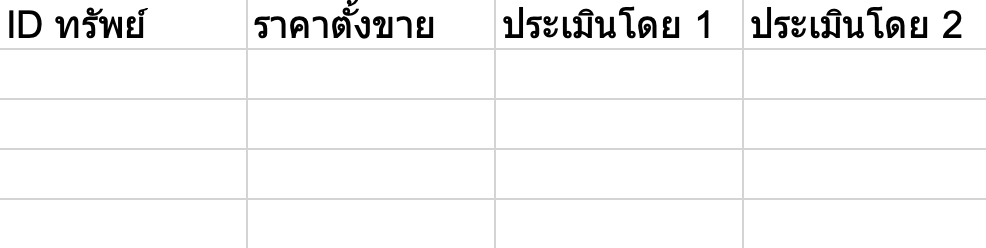

In [64]:
c2['ประเมิน1'] = c2['post id'].map(c1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
c2.head()

<ipython-input-64-2beab86c4d4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2['ประเมิน1'] = c2['post id'].map(c1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000.0,3200000.0,ราคาเสนอขาย 3 - 5 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,990000.0,800000.0,"ราคาเสนอขาย 700,000 - 1,000,000 บาท / คูหา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0


###rename column

In [65]:
c2.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### select columns

In [66]:
townhome = c2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]
townhome

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1430000.0,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1980000.0,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000.0,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000.0,1600000.0,1700000.0


In [67]:
townhome.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2      False
dtype: bool

##MAPE ผู้ประเมินเป็นหลัก เทียบ ราคาทรัพย์

- โดยผู้ประเมินคนที่ 1 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 16.209125736159383

- โดยผู้ประเมินคนที่ 2 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 12.753580848193073


In [68]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = townhome['ประเมิน1']
y_pred = townhome['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

16.209125736159383

In [69]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = townhome['ประเมิน2']
y_pred = townhome['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

12.753580848193073

#ข้อมูลประเมิน(อาคารพาณิชย์)

In [70]:
df5.head()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,10.0
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,13500000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN


##ผู้ประเมินคนที่ 1

In [71]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 1 
b1 = df5[df5['ID ผู้ประเมิน']==1]
b1.count()

ID ผู้ประเมิน                     10
post id                           10
property_type                     10
ความมั่นใจในการเมินราคาทรัพย์     10
ราคาทรัพย์                        10
ประเมินราคาซื้อ-ขาย               10
ปัจจัยในการประเมินราคาซื้อ-ขาย    10
เหตุผลไม่มั่นใจราคาประเมิน         0
ให้คะแนนทรัพย์                    10
Unnamed: 9                        10
Unnamed: 10                       10
Unnamed: 11                        0
Unnamed: 12                        0
Unnamed: 13                        1
dtype: int64

ผู้ประเมินคนที่ 1 ประเมินอาคารพาณิชย์ไว้ทั้งหมด 10 ทรัพย์

In [72]:
b1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,10.0,1.000000e+01,1.000000e+01,0.0,10.000000,0.0,0.0,1.0
mean,1.0,7.710000e+06,6.260000e+06,NaN,2.700000,NaN,NaN,10.0
std,0.0,5.926110e+06,3.913850e+06,NaN,0.823273,NaN,NaN,NaN
min,1.0,2.400000e+06,2.200000e+06,NaN,2.000000,NaN,NaN,10.0
25%,1.0,4.125000e+06,3.650000e+06,NaN,2.000000,NaN,NaN,10.0
50%,1.0,6.000000e+06,5.000000e+06,NaN,2.500000,NaN,NaN,10.0
75%,1.0,8.500000e+06,7.750000e+06,NaN,3.000000,NaN,NaN,10.0
max,1.0,2.250000e+07,1.350000e+07,NaN,4.000000,NaN,NaN,10.0


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์อาคารพาณิชย์ของคนที่ 1 = 2.200000e+06	
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์อาคารพาณิชย์ของคนที่ 1 = 1.350000e+07	

In [73]:
b1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [74]:
b1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    5
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     3
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      2
Name: ให้คะแนนทรัพย์, dtype: int64

##ผู้ประเมินคนที่ 2

In [75]:
#เลือกคอลัมน์ผู้ประเมินคนที่ 2
b2 = df5[df5['ID ผู้ประเมิน']==2]
b2.count()

ID ผู้ประเมิน                     10
post id                           10
property_type                     10
ความมั่นใจในการเมินราคาทรัพย์     10
ราคาทรัพย์                        10
ประเมินราคาซื้อ-ขาย               10
ปัจจัยในการประเมินราคาซื้อ-ขาย    10
เหตุผลไม่มั่นใจราคาประเมิน         0
ให้คะแนนทรัพย์                    10
Unnamed: 9                        10
Unnamed: 10                       10
Unnamed: 11                        0
Unnamed: 12                        0
Unnamed: 13                        0
dtype: int64

ผู้ประเมินคนที่ 2 ประเมินอาคารพาณิชย์ไว้ทั้งหมด 10 ทรัพย์

In [76]:
b2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,10.0,1.000000e+01,1.000000e+01,0.0,10.000000,0.0,0.0,0.0
mean,2.0,7.710000e+06,7.610000e+06,NaN,2.800000,NaN,NaN,NaN
std,0.0,5.926110e+06,5.408728e+06,NaN,0.918937,NaN,NaN,NaN
min,2.0,2.400000e+06,2.100000e+06,NaN,2.000000,NaN,NaN,NaN
25%,2.0,4.125000e+06,4.000000e+06,NaN,2.000000,NaN,NaN,NaN
50%,2.0,6.000000e+06,6.500000e+06,NaN,2.500000,NaN,NaN,NaN
75%,2.0,8.500000e+06,9.500000e+06,NaN,3.750000,NaN,NaN,NaN
max,2.0,2.250000e+07,2.000000e+07,NaN,4.000000,NaN,NaN,NaN


- ราคาซื้อ-ขายที่น้อยที่สุดของสินทรัพย์อาคารพาณิชย์ของคนที่ 2 = 2.100000e+06
- ราคาซื้อ-ขายที่มากที่สุดของสินทรัพย์อาคารพาณิชย์ของคนที่ 2 = 2.000000e+07	

In [77]:
b2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [78]:
b2['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    5
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      3
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     2
Name: ให้คะแนนทรัพย์, dtype: int64

##เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์(อาคารพาณิชย์)ของนักประเมินแต่ละคนและของราคาตั้งขาย


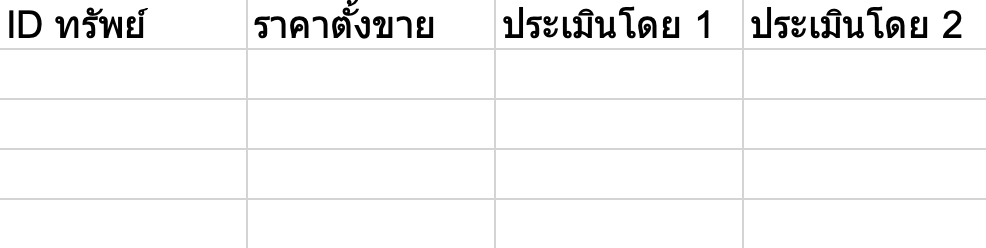

In [79]:
b2['ประเมิน1'] = b2['post id'].map(b1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
b2.head()

<ipython-input-79-5730ce203b31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b2['ประเมิน1'] = b2['post id'].map(b1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,6000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,12000000.0
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,NaN,13500000.0
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000.0,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,4000000.0
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000.0,3000000.0,ราคาซื้อขาย 3-4 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,2200000.0


###rename column

In [80]:
b2.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### select columns

In [81]:
build = b2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]
build

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0


In [82]:
build.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2      False
dtype: bool

##MAPE ผู้ประเมินเป็นหลัก เทียบ ราคาทรัพย์

- โดยผู้ประเมินคนที่ 1 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 25.4518341307815

- โดยผู้ประเมินคนที่ 2 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 12.428571428571429


In [83]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = build['ประเมิน1']
y_pred = build['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

25.4518341307815

In [84]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = build['ประเมิน2']
y_pred = build['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

12.428571428571429

#Quiz2

##เขียน function ตรวจสอบค่าที่เติม 0 ผิด

In [85]:
max(10,2)

10

In [86]:
def check_v(in1,in2):
    return max(in1/in2,in2/in1)

In [87]:
check_v(100,12)

8.333333333333334

In [88]:
check_v(100,1200)

12.0

#HW2 
แก้ไข ข้อมูลแล้วคำนวณ MAPE ใหม่อีกรอบมาเทียบกัน

##บ้าน
ไม่มีค่าที่อยู่ประมาณ 10 หมายความว่า ไม่มีข้อมูลที่ผิดพลาด ค่า MAPE มีค่าเท่าเดิม

In [89]:
house = a2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]
house['check1']=house.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
house['check2']=house.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
house

<ipython-input-89-8a723a4ba2c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['check1']=house.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-89-8a723a4ba2c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['check2']=house.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0,1.080000,1.000000
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0,1.181818,1.083333
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0,1.180000,1.525424
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0,1.257143,1.189189
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0,1.100000,1.100000
...,...,...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0,1.222222,1.100000
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0,1.521346,1.069054
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0,1.000000,1.025641


In [90]:
house.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
75,https://nayoo.co/khonkaen/posts/1,390000.0,600000.0,1300000.0,1.538462,3.333333
177,https://nayoo.co/khonkaen/posts/19450,2100000.0,3200000.0,2200000.0,1.523810,1.047619
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0,1.521346,1.069054
101,https://nayoo.co/khonkaen/posts/6010,2860000.0,4200000.0,3000000.0,1.468531,1.048951
...,...,...,...,...,...,...
43,https://nayoo.co/khonkaen/posts/1128,4200000.0,4200000.0,5000000.0,1.000000,1.190476
87,https://nayoo.co/khonkaen/posts/3905,1200000.0,1200000.0,1350000.0,1.000000,1.125000
65,https://nayoo.co/khonkaen/posts/2143,5200000.0,5200000.0,5000000.0,1.000000,1.040000
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0,1.000000,1.025641


In [91]:
house.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
75,https://nayoo.co/khonkaen/posts/1,390000.0,600000.0,1300000.0,1.538462,3.333333
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0,1.180000,1.525424
111,https://nayoo.co/khonkaen/posts/6045,2915000.0,2000000.0,2000000.0,1.457500,1.457500
83,https://nayoo.co/khonkaen/posts/3721,3100000.0,3500000.0,4000000.0,1.129032,1.290323
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
...,...,...,...,...,...,...
69,https://nayoo.co/khonkaen/posts/2262,3200000.0,3300000.0,3200000.0,1.031250,1.000000
57,https://nayoo.co/khonkaen/posts/1895,1200000.0,1500000.0,1200000.0,1.250000,1.000000
37,https://nayoo.co/khonkaen/posts/760,1800000.0,1700000.0,1800000.0,1.058824,1.000000
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0,1.080000,1.000000


##ที่ดิน

In [92]:
land = t2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]
land['check1']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
land['check2']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
land

<ipython-input-92-ea61f952b88e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land['check1']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-92-ea61f952b88e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land['check2']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0,1.555556,1.400000
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0,1.862500,1.241667
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0,1.857143,1.083333
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0,1.363636,1.200000
...,...,...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0,1.250000,1.250000
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0,1.325000,1.060000
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0,1.153846,1.153846


In [93]:
land.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
194,https://nayoo.co/khonkaen/posts/13702,90000000,4500000.0,75000000.0,20.000000,1.200000
112,https://nayoo.co/khonkaen/posts/7955,2600000,32000000.0,2000000.0,12.307692,1.300000
58,https://nayoo.co/khonkaen/posts/9203,160000000,14000000.0,11000000.0,11.428571,14.545455
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
...,...,...,...,...,...,...
182,https://nayoo.co/khonkaen/posts/9598,3900000,4000000.0,4000000.0,1.025641,1.025641
78,https://nayoo.co/khonkaen/posts/3447,980000,1000000.0,800000.0,1.020408,1.225000
100,https://nayoo.co/khonkaen/posts/1663,1485000,1500000.0,1200000.0,1.010101,1.237500
122,https://nayoo.co/khonkaen/posts/12762,650000,650000.0,700000.0,1.000000,1.076923


In [94]:
land.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
58,https://nayoo.co/khonkaen/posts/9203,160000000,14000000.0,11000000.0,11.428571,14.545455
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
148,https://nayoo.co/khonkaen/posts/3561,7374550,6000000.0,80000000.0,1.229092,10.848120
188,https://nayoo.co/khonkaen/posts/12250,2300000,2500000.0,24000000.0,1.086957,10.434783
144,https://nayoo.co/khonkaen/posts/3341,1700000,1600000.0,9000000.0,1.062500,5.294118
...,...,...,...,...,...,...
104,https://nayoo.co/khonkaen/posts/1921,8080000,2800000.0,8000000.0,2.885714,1.010000
60,https://nayoo.co/khonkaen/posts/12607,7990000,10000000.0,8000000.0,1.251564,1.001252
158,https://nayoo.co/khonkaen/posts/6732,3500000,2800000.0,3500000.0,1.250000,1.000000
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000


###เลือกค่าผลต่างที่อยู่ในช่วง 10 มาแก้ศูนย์ แล้วคิดค่า MAPE ใหม่

####อันเก่า

In [95]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import numpy as np
land = pd.read_excel('/content/drive/MyDrive/DPDM/คำตอบนักประเมิน.xlsx',sheet_name='ที่ดิน')

t1 = land[land['ID ผู้ประเมิน']==1]
t1 = t1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
t2 = land[land['ID ผู้ประเมิน']==2]
t2 = t2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
t2.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True)
t2['ประเมิน1'] = t2['post id'].map(t1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
landd = t2[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
landd['check1']=landd.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
landd['check2']=landd.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)

t1MAPE = MAPE(landd['ประเมิน1'],pd.to_numeric(landd['ราคาทรัพย์']))
t2MAPE = MAPE(landd['ประเมิน2'],pd.to_numeric(landd['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {t1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {t2MAPE*100:.2f}%')
landd = t2.dropna(subset=['ประเมิน2','ประเมิน1','ราคาทรัพย์'])
one2two = MAPE(landd['ประเมิน1'],landd['ประเมิน2'])
two2one = MAPE(landd['ประเมิน2'],landd['ประเมิน1'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(landd)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 83.48%
นักประเมิน คนที่ 2 = 48.38%
ความผิดพลาดระหว่างนักประเมินทั้ง 58.41%
จำนวนทรัพย์ทั้งหมด 100 ทรัพย์


<ipython-input-95-27243e0e12cb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  landd['check1']=landd.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-95-27243e0e12cb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  landd['check2']=landd.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


####อันใหม่

In [96]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import numpy as np
land = pd.read_excel('/content/drive/MyDrive/DPDM/คำตอบนักประเมิน.xlsx',sheet_name='ที่ดิน')

t1 = land[land['ID ผู้ประเมิน']==1]
t1 = t1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
t2 = land[land['ID ผู้ประเมิน']==2]
t2 = t2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
t2.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True)
t2['ประเมิน1'] = t2['post id'].map(t1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
landd = t2[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]
landd['check1']=landd.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
landd['check2']=landd.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)

landd['ประเมิน1'] = np.where(landd['check1'] > 10, landd['ประเมิน1']*10, landd['ประเมิน1'])
landd['ประเมิน2'] = np.where(landd['check2'] > 10, landd['ประเมิน2']*10, landd['ประเมิน2'])

t1MAPE = MAPE(landd['ประเมิน1'],pd.to_numeric(landd['ราคาทรัพย์']))
t2MAPE = MAPE(landd['ประเมิน2'],pd.to_numeric(landd['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {t1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {t2MAPE*100:.2f}%')
landd = t2.dropna(subset=['ประเมิน2','ประเมิน1','ราคาทรัพย์'])
one2two = MAPE(landd['ประเมิน1'],landd['ประเมิน2'])
two2one = MAPE(landd['ประเมิน2'],landd['ประเมิน1'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(landd)} ทรัพย์')


ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 46.08%
นักประเมิน คนที่ 2 = 23.21%
ความผิดพลาดระหว่างนักประเมินทั้ง 58.41%
จำนวนทรัพย์ทั้งหมด 100 ทรัพย์


<ipython-input-96-7b4ecdec6a38>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  landd['check1']=landd.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-96-7b4ecdec6a38>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  landd['check2']=landd.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
<ipython-input-96-7b4ecdec6a38>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

##ทาวน์โฮม
ไม่มีค่าที่อยู่ประมาณ 10 หมายความว่า ไม่มีข้อมูลที่ผิดพลาด ค่า MAPE มีค่าเท่าเดิม

In [97]:
townhome = c2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]
townhome['check1']=townhome.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
townhome['check2']=townhome.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
townhome

<ipython-input-97-8e0f2c9a788e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  townhome['check1']=townhome.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-97-8e0f2c9a788e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  townhome['check2']=townhome.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0,1.492857,1.435407
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0,1.005714,1.136364
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0,1.100000,1.203125
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0,1.010101,1.237500
...,...,...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1430000.0,1000000.0,1200000.0,1.430000,1.191667
236,https://nayoo.co/khonkaen/posts/18551,1980000.0,1500000.0,1700000.0,1.320000,1.164706
237,https://nayoo.co/khonkaen/posts/19434,2000000.0,1600000.0,1900000.0,1.250000,1.052632
238,https://nayoo.co/khonkaen/posts/19501,1790000.0,1600000.0,1700000.0,1.118750,1.052941


In [98]:
townhome.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
176,https://nayoo.co/khonkaen/posts/3528,2190000.0,350000.0,400000.0,6.257143,5.475000
180,https://nayoo.co/khonkaen/posts/6095,2420000.0,1500000.0,1500000.0,1.613333,1.613333
132,https://nayoo.co/khonkaen/posts/619,1430000.0,950000.0,1000000.0,1.505263,1.430000
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0,1.492857,1.435407
174,https://nayoo.co/khonkaen/posts/3478,2190000.0,1500000.0,2200000.0,1.460000,1.004566
...,...,...,...,...,...,...
228,https://nayoo.co/khonkaen/posts/17923,1990000.0,2000000.0,2200000.0,1.005025,1.105528
167,https://nayoo.co/khonkaen/posts/2829,2490000.0,2500000.0,2300000.0,1.004016,1.082609
220,https://nayoo.co/khonkaen/posts/17545,2800000.0,2800000.0,2800000.0,1.000000,1.000000
200,https://nayoo.co/khonkaen/posts/13411,3200000.0,3200000.0,3200000.0,1.000000,1.000000


In [99]:
townhome.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
176,https://nayoo.co/khonkaen/posts/3528,2190000.0,350000.0,400000.0,6.257143,5.475000
234,https://nayoo.co/khonkaen/posts/18090,3000000.0,2800000.0,1500000.0,1.071429,2.000000
180,https://nayoo.co/khonkaen/posts/6095,2420000.0,1500000.0,1500000.0,1.613333,1.613333
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0,1.335714,1.604278
225,https://nayoo.co/khonkaen/posts/17742,2500000.0,2200000.0,1700000.0,1.136364,1.470588
...,...,...,...,...,...,...
188,https://nayoo.co/khonkaen/posts/8101,3200000.0,3300000.0,3200000.0,1.031250,1.000000
220,https://nayoo.co/khonkaen/posts/17545,2800000.0,2800000.0,2800000.0,1.000000,1.000000
199,https://nayoo.co/khonkaen/posts/12957,1500000.0,1600000.0,1500000.0,1.066667,1.000000
151,https://nayoo.co/khonkaen/posts/1978,2500000.0,2700000.0,2500000.0,1.080000,1.000000


##อาคารพาณิชย์
ไม่มีค่าที่อยู่ประมาณ 10 หมายความว่า ไม่มีข้อมูลที่ผิดพลาด ค่า MAPE มีค่าเท่าเดิม

In [100]:
build = b2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]
build['check1']=build.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
build['check2']=build.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
build

<ipython-input-100-b2700f722b3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  build['check1']=build.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-100-b2700f722b3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  build['check2']=build.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0,1.166667,1.142857
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0,1.000000,1.000000
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0,1.666667,1.125000
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0,1.142857,1.142857
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0,1.772727,1.300000
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0,1.333333,1.200000
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0,1.041667,1.142857
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0,1.315789,1.000000
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0,1.000000,1.142857
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0,1.125000,1.111111


In [101]:
build.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0,1.772727,1.300000
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0,1.666667,1.125000
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0,1.333333,1.200000
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0,1.315789,1.000000
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0,1.166667,1.142857
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0,1.142857,1.142857
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0,1.125000,1.111111
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0,1.041667,1.142857
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0,1.000000,1.000000
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0,1.000000,1.142857


In [102]:
build.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0,1.772727,1.300000
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0,1.333333,1.200000
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0,1.166667,1.142857
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0,1.142857,1.142857
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0,1.041667,1.142857
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0,1.000000,1.142857
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0,1.666667,1.125000
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0,1.125000,1.111111
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0,1.000000,1.000000
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0,1.315789,1.000000


#Answer

In [103]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
new = pd.read_excel(f'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx', sheet_name ='บ้าน')
new1 = new[new['ID ผู้ประเมิน']==1]
id1 = new1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
new2 =  new[new['ID ผู้ประเมิน']==2]
id2 = new2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2two = MAPE(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมิน2'])
two2one = MAPE(id2_d['ประเมิน2'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 14.50%
นักประเมิน คนที่ 2 = 11.14%
ความผิดพลาดระหว่างนักประเมินทั้ง 14.56%
จำนวนทรัพย์ทั้งหมด 498 ทรัพย์


<ipython-input-103-2ef275b6438c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


In [104]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import numpy as np
land = pd.read_excel(f'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx', sheet_name ='land')

t1 = land[land['ID ผู้ประเมิน']==1]
t1 = t1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
t2 = land[land['ID ผู้ประเมิน']==2]
t2 = t2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
t2.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True)
t2['ประเมิน1'] = t2['post id'].map(t1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
landd = t2[['post id','ราคาทรัพย์','ประเมิน1','ประเมิน2']]

t1MAPE = MAPE(landd['ประเมิน1'],pd.to_numeric(landd['ราคาทรัพย์']))
t2MAPE = MAPE(landd['ประเมิน2'],pd.to_numeric(landd['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {t1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {t2MAPE*100:.2f}%')
landd = t2.dropna(subset=['ประเมิน2','ประเมิน1','ราคาทรัพย์'])
one2two = MAPE(landd['ประเมิน1'],landd['ประเมิน2'])
two2one = MAPE(landd['ประเมิน2'],landd['ประเมิน1'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(landd)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 79.74%
นักประเมิน คนที่ 2 = 43.70%
ความผิดพลาดระหว่างนักประเมินทั้ง 58.41%
จำนวนทรัพย์ทั้งหมด 100 ทรัพย์


#HW3 
Visualize แสดงความสัมพันธ์ ราคา(ตั้งขายและประเมิน) - ความมั่นใจ - ให้คะแนนทรัพย์

In [105]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

##home

In [106]:
import pandas as pd
home = pd.read_excel(f'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx', sheet_name ='บ้าน')
home.corr(method ='pearson').style.background_gradient(cmap="Greys")

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ID ผู้ประเมิน,1.000000,-0.001373,0.022823
ราคาทรัพย์,-0.001373,1.000000,0.834722
ประเมินราคาซื้อ-ขาย,0.022823,0.834722,1.000000


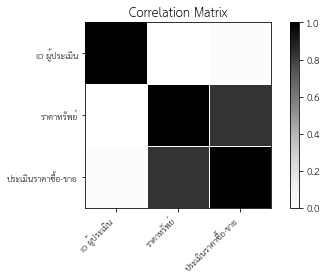

In [107]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

corr = home.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns), cmap='Greys')
plt.show()

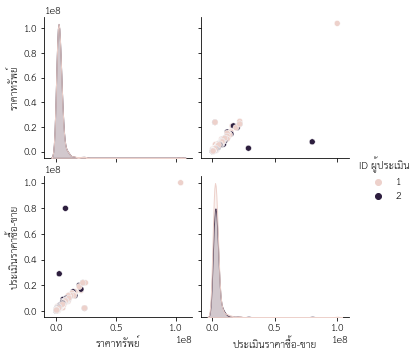

In [162]:
sns.pairplot(home, hue="ID ผู้ประเมิน")

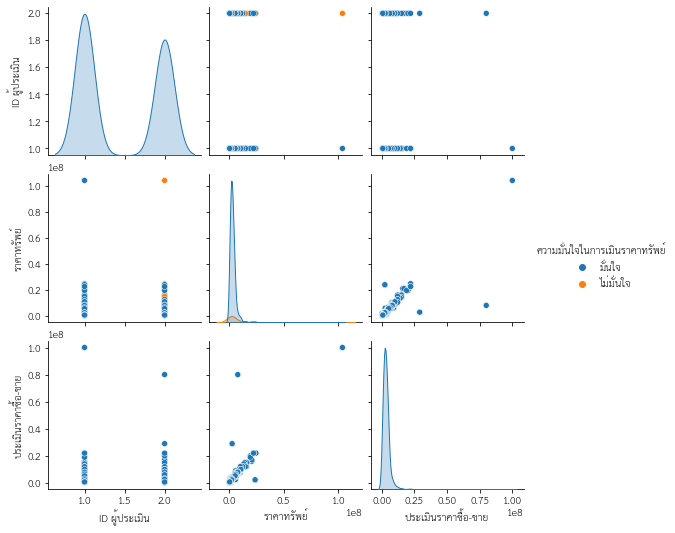

In [164]:
sns.pairplot(home, hue="ความมั่นใจในการเมินราคาทรัพย์")

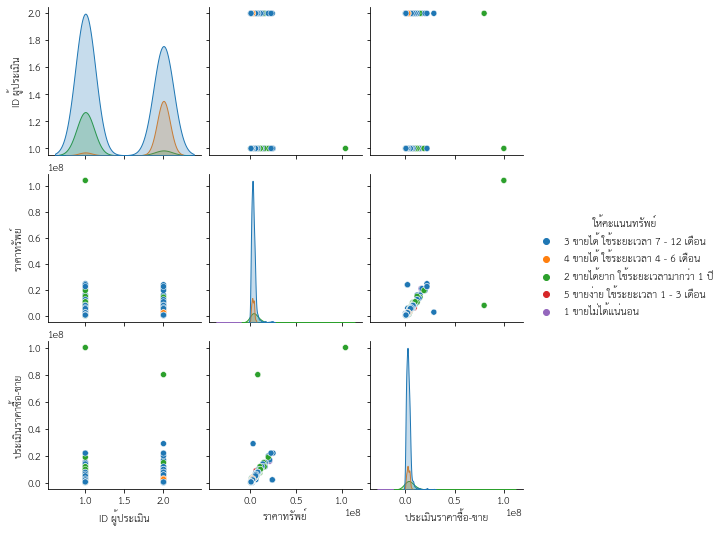

In [125]:
sns.pairplot(home, hue="ให้คะแนนทรัพย์")

In [130]:
h1 = home[home['ID ผู้ประเมิน']==1]
h2 = home[home['ID ผู้ประเมิน']==2]
h2['ประเมิน1'] = h2['post id'].map(a1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
h2.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True)

<ipython-input-130-bef8f61cddbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2['ประเมิน1'] = h2['post id'].map(a1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


##land

In [108]:
import pandas as pd
land = pd.read_excel(f'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx', sheet_name ='land')
land.corr().style.background_gradient(cmap="OrRd")

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ID ผู้ประเมิน,1.000000,0.023654,0.047823
ราคาทรัพย์,0.023654,1.000000,0.759001
ประเมินราคาซื้อ-ขาย,0.047823,0.759001,1.000000


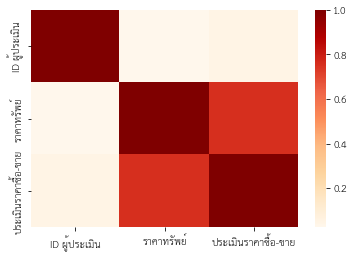

In [109]:
import seaborn as sns
corr = land.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = 'OrRd')

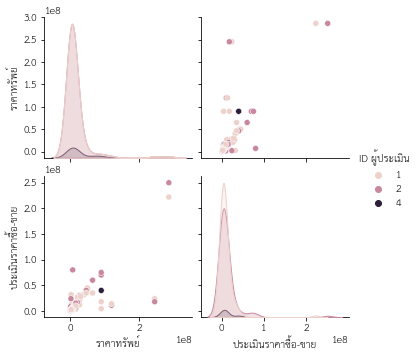

In [161]:
sns.pairplot(land, hue="ID ผู้ประเมิน")

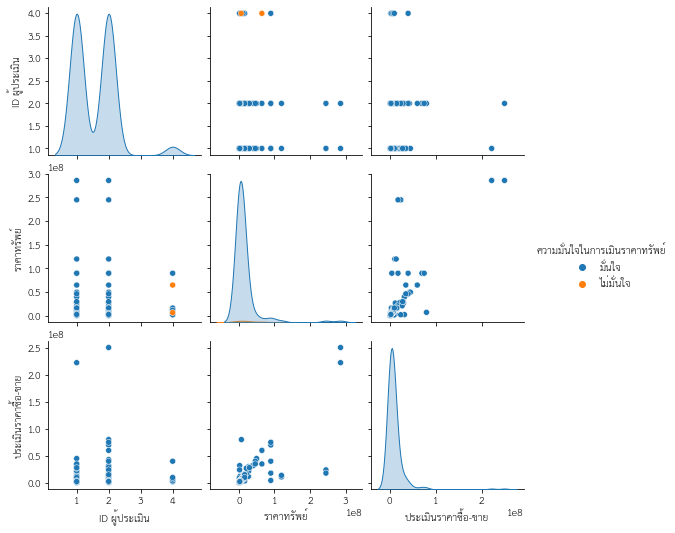

In [163]:
sns.pairplot(land, hue="ความมั่นใจในการเมินราคาทรัพย์")

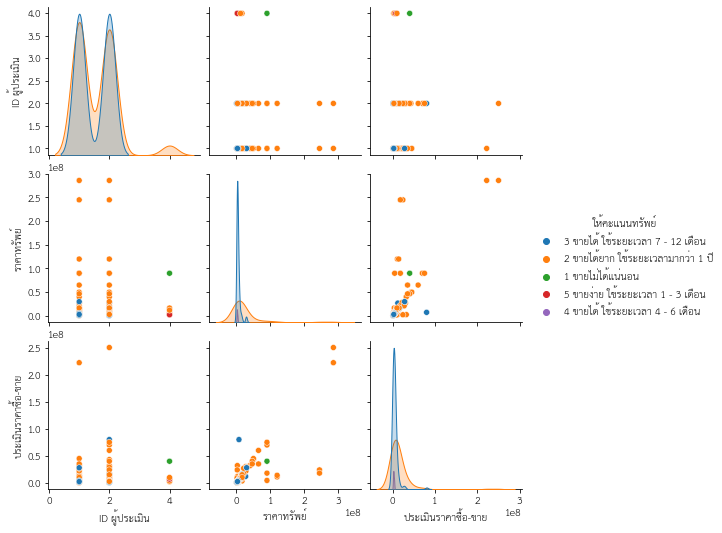

In [126]:
sns.pairplot(land, hue="ให้คะแนนทรัพย์")

##Townhome

In [165]:
import pandas as pd
townhome = pd.read_excel(f'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx', sheet_name ='ทาวน์โฮม')
townhome = townhome[['ID ผู้ประเมิน','ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์','ความมั่นใจในการเมินราคาทรัพย์']]

In [166]:
townhome.corr().style.background_gradient(cmap="Greens")

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ID ผู้ประเมิน,1.000000,-0.000000,-0.006154
ราคาทรัพย์,-0.000000,1.000000,0.925450
ประเมินราคาซื้อ-ขาย,-0.006154,0.925450,1.000000


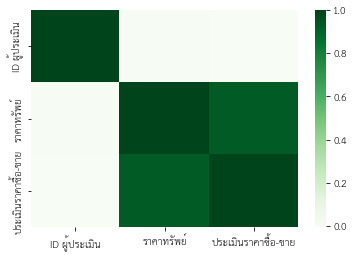

In [167]:
import seaborn as sns
corr = townhome.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = 'Greens')

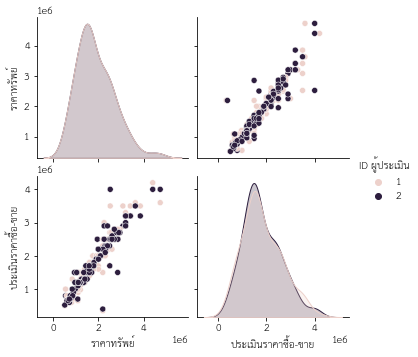

In [160]:
sns.pairplot(townhome, hue="ID ผู้ประเมิน")

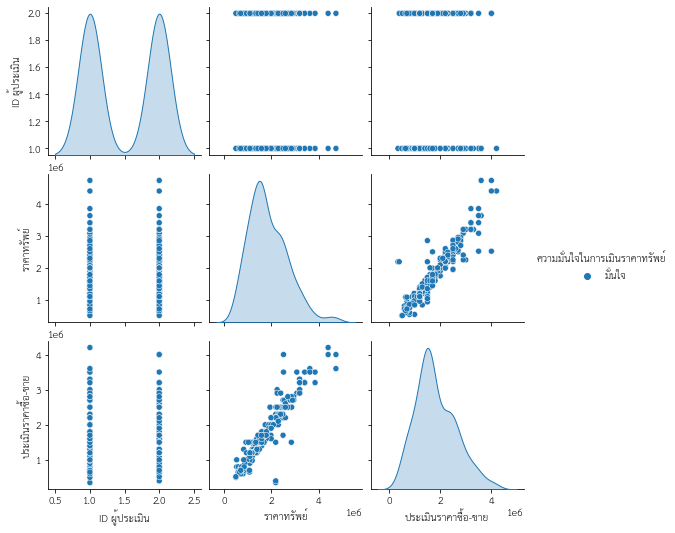

In [168]:
sns.pairplot(townhome, hue="ความมั่นใจในการเมินราคาทรัพย์")

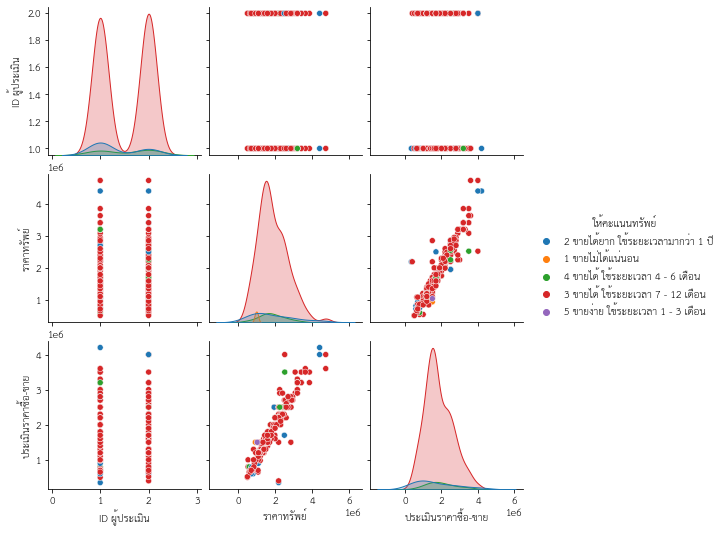

In [153]:
sns.pairplot(townhome, hue="ให้คะแนนทรัพย์")

##Building

In [170]:
import pandas as pd
build = pd.read_excel(f'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx', sheet_name ='อาคารพาณิชย์')
build = build[['ID ผู้ประเมิน','ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์','ความมั่นใจในการเมินราคาทรัพย์']]

In [171]:
build.corr().style.background_gradient(cmap="Purples")

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ID ผู้ประเมิน,1.000000,0.000000,0.045325
ราคาทรัพย์,0.000000,1.000000,0.939407
ประเมินราคาซื้อ-ขาย,0.045325,0.939407,1.000000


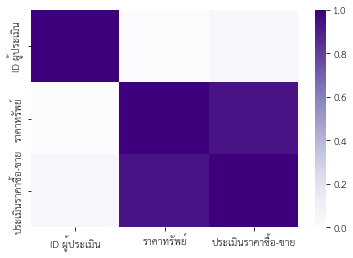

In [172]:
import seaborn as sns
corr = build.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = 'Purples')

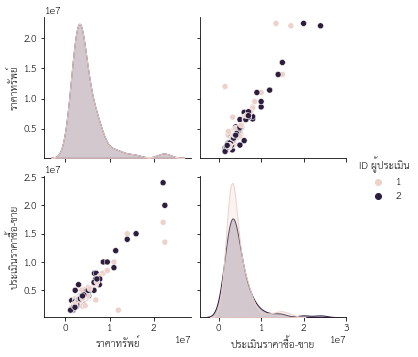

In [173]:
sns.pairplot(build, hue="ID ผู้ประเมิน")

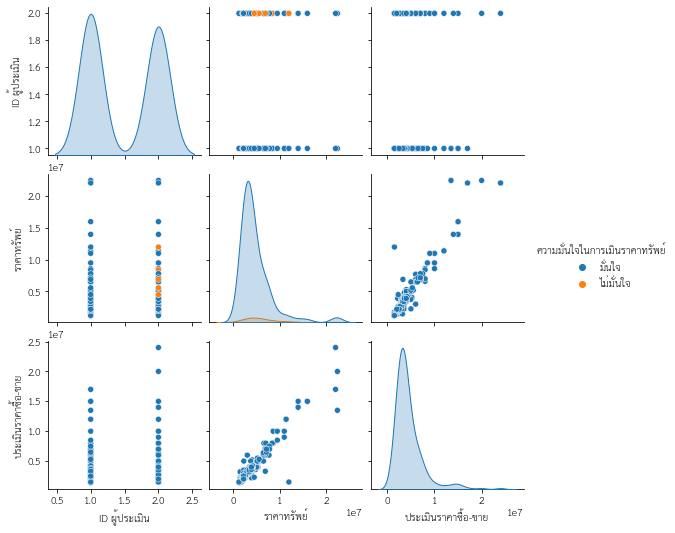

In [174]:
sns.pairplot(build, hue="ความมั่นใจในการเมินราคาทรัพย์")

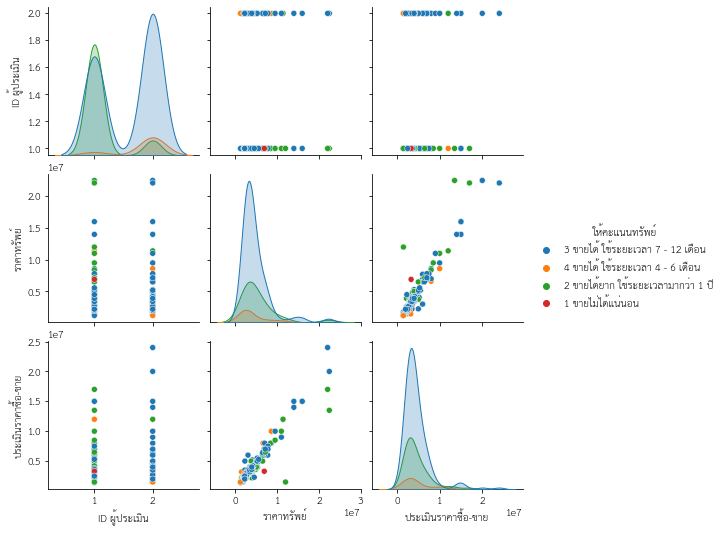

In [158]:
sns.pairplot(build, hue="ให้คะแนนทรัพย์")